# Análise do valor do dolar ao longo dos anos em diferentes países

## Authors: 
### Gabriel Borges
### Isabelle Oliveira

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import geopandas as gpd
def legenda_format():
    return plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 15})


In [2]:
dfusd = pd.read_csv('daily.csv')

In [3]:
 world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Visualizando dados importados

In [4]:
dfusd.head()

,Date,Country,Exchange rate
0,1971-01-04,Australia,0.898715
1,1971-01-05,Australia,0.898311
2,1971-01-06,Australia,0.897666
3,1971-01-07,Australia,0.897827
4,1971-01-08,Australia,0.898957


## Listando colunas do arquivo

In [5]:
dfusd.columns

Index(['Date', 'Country', 'Exchange rate'], dtype='object')

## Informações dos dados

In [6]:
dfusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229136 entries, 0 to 229135
Data columns (total 3 columns):
Date             229136 non-null object
Country          229136 non-null object
Exchange rate    220358 non-null float64
dtypes: float64(1), object(2)
memory usage: 5.2+ MB


# Retirando linhas vazias

In [7]:
dfusd.dropna(inplace = True)
dfusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220358 entries, 0 to 229135
Data columns (total 3 columns):
Date             220358 non-null object
Country          220358 non-null object
Exchange rate    220358 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.7+ MB


### Formatando o tipo da coluna 'Date'

In [8]:
dfusd['Date'] = pd.to_datetime(dfusd['Date'],
                              format='%Y %m %d')
print(dfusd['Date'].dtypes)


datetime64[ns]


## Lista de países

In [9]:
listC = list(set(dfusd['Country']))

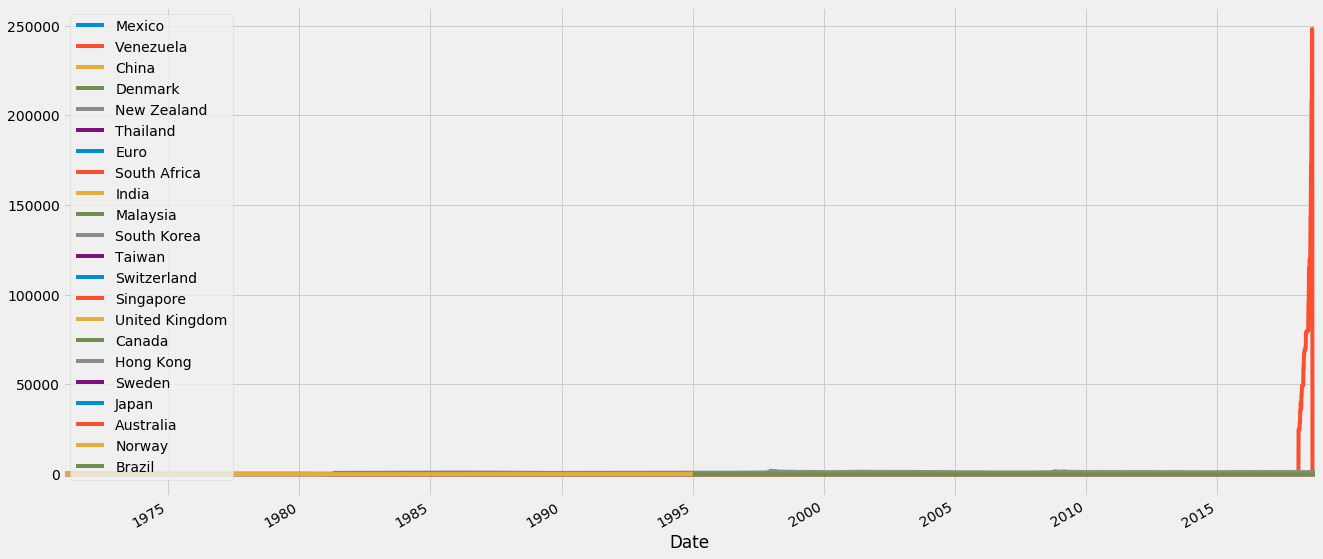

In [10]:
plt.style.use('fivethirtyeight')
for c in listC:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10))
plt.show()

## Crise econômica de 2007-2008

In [11]:
list2008 = list(set( dfusd.loc[(dfusd['Date'].dt.year <= 2009) &
                    (dfusd['Date'].dt.year >= 2006) &
                    (dfusd['Exchange rate'] <= 4), 
                    'Country']))
print(list2008)

['Singapore', 'United Kingdom', 'Euro', 'Australia', 'Venezuela', 'Canada', 'Brazil', 'Malaysia', 'New Zealand', 'Switzerland']


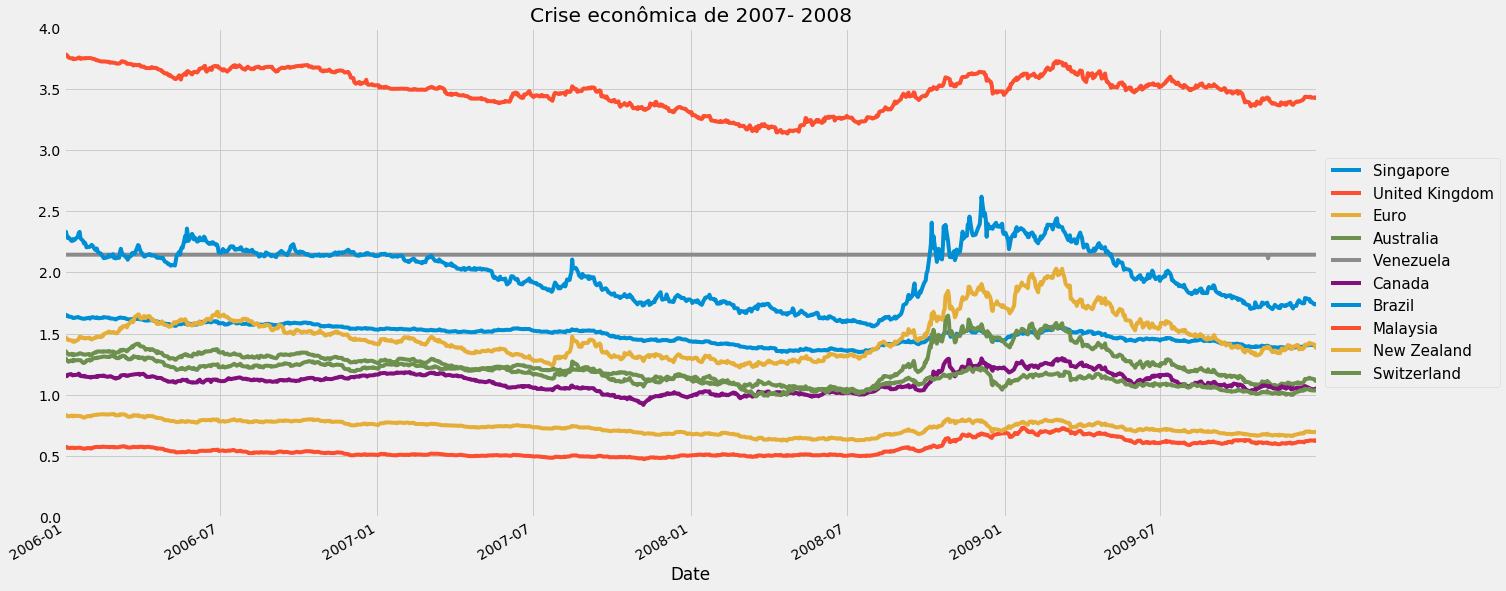

In [12]:
plt.style.use('fivethirtyeight')
for c in list2008:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Crise econômica de 2007- 2008',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (0, 4)).set_xlim(left= dt.datetime(2006,1,1), 
                                                              right= dt.datetime(2009,12,31))
legenda_format()
plt.show()

## 11 de Setembro

In [13]:
list11set = list(set( dfusd.loc[(dfusd['Date'].dt.year >= 2001) &
                    (dfusd['Date'].dt.year <= 2002) &
                    (dfusd['Exchange rate'] <= 12.5), 
                    'Country']))
print(list2008)

['Singapore', 'United Kingdom', 'Euro', 'Australia', 'Venezuela', 'Canada', 'Brazil', 'Malaysia', 'New Zealand', 'Switzerland']


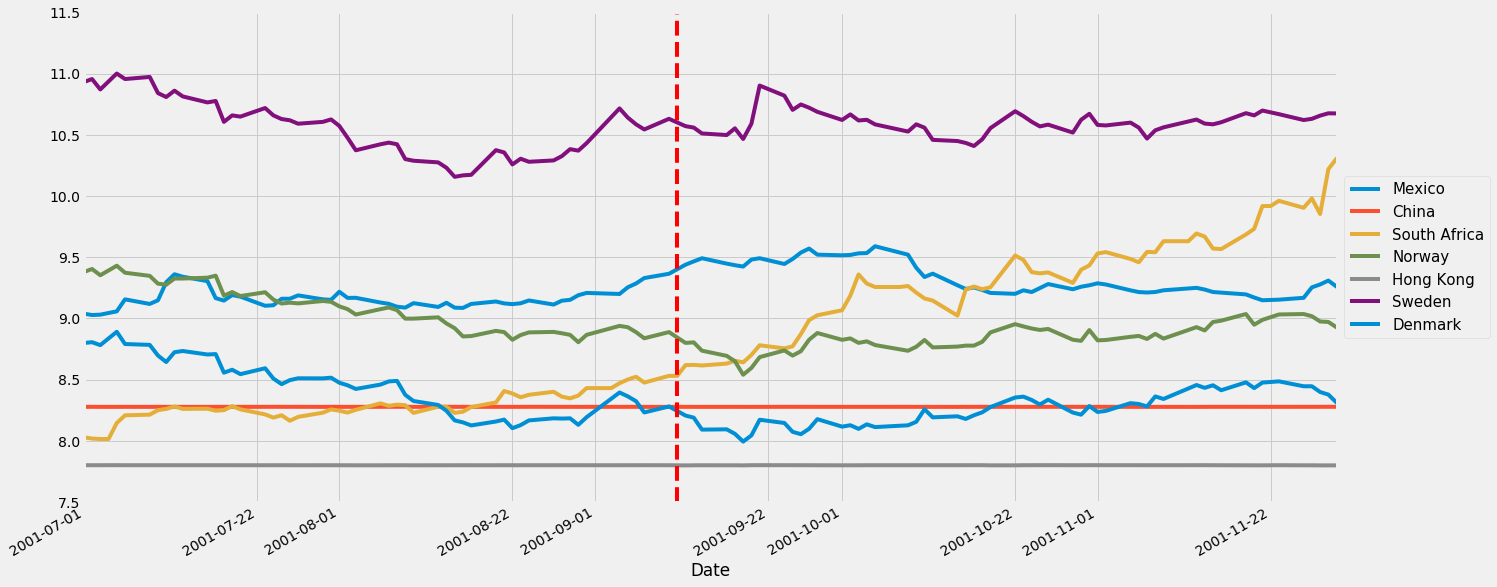

In [14]:
plt.style.use('fivethirtyeight')
list11set = list(set( dfusd.loc[(dfusd['Date'].dt.year >= 2001) &
                    (dfusd['Date'].dt.year <= 2002) &
                    (dfusd['Exchange rate'] <= 11.5)&
                    (dfusd['Exchange rate'] >= 7.5), 
                    'Country']))
for c in list11set:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (7.5, 11.5)).set_xlim(left=dt.datetime(2001,7,1), 
                                                                   right=dt.datetime(2001,11,30))
plt.axvline(dt.datetime(2001,9,11), c = 'red', ls = '--')
legenda_format()
plt.show()

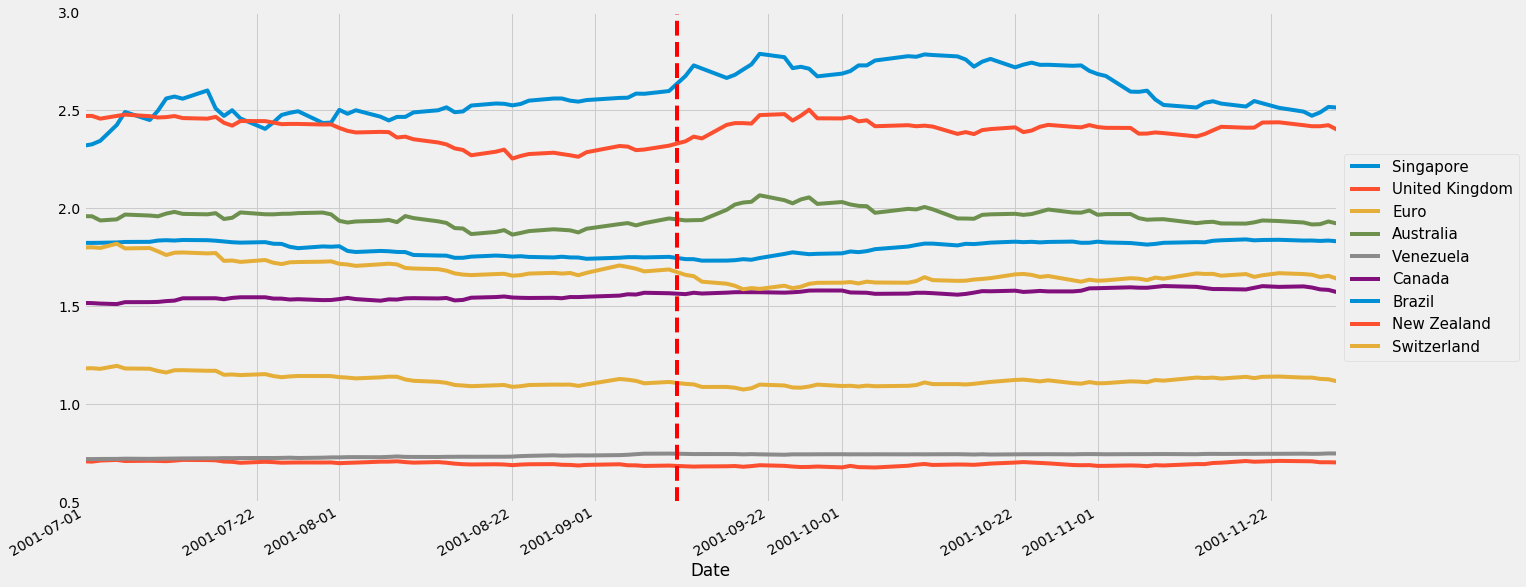

In [15]:
plt.style.use('fivethirtyeight')
list11set = list(set( dfusd.loc[(dfusd['Date'].dt.year >= 2001) &
                    (dfusd['Date'].dt.year <= 2002) &
                    (dfusd['Exchange rate'] <= 3), 
                    'Country']))
for c in list11set:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (0.5, 3)).set_xlim(left=dt.datetime(2001,7,1), 
                                                                right=dt.datetime(2001,11,30))
plt.axvline(dt.datetime(2001,9,11), c = 'red', ls = '--')
legenda_format()
plt.show()

## Tigres asiáticos

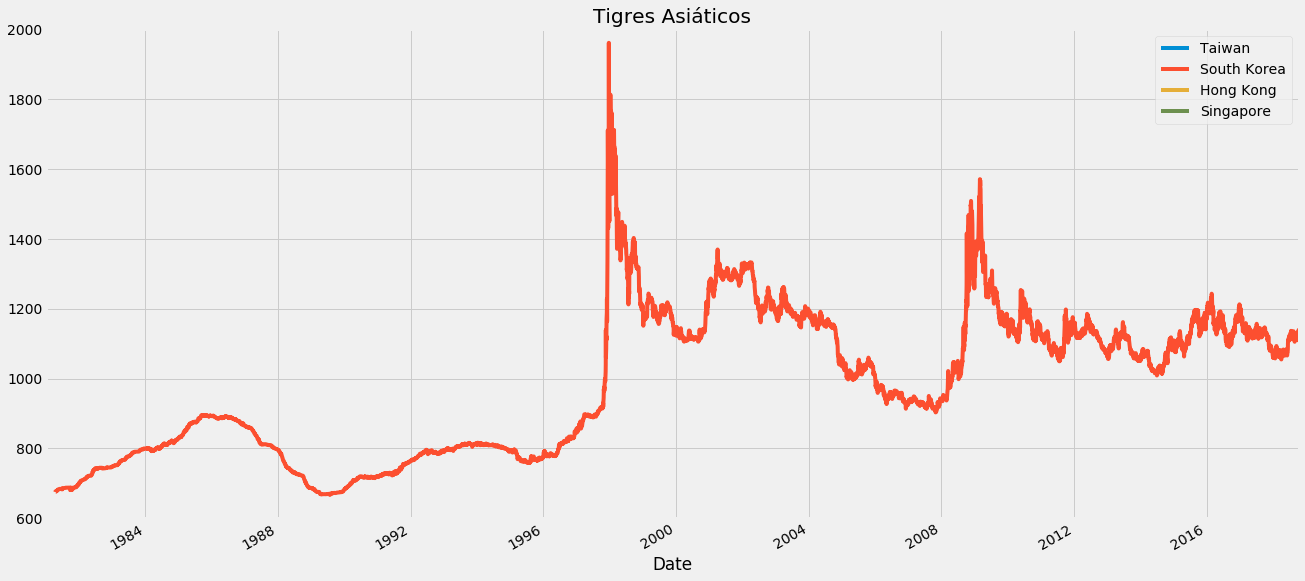

In [16]:
plt.style.use('fivethirtyeight')
listTigers = ['Taiwan', 'South Korea', 'Hong Kong', 'Singapore']
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (600, 2000))
plt.show()

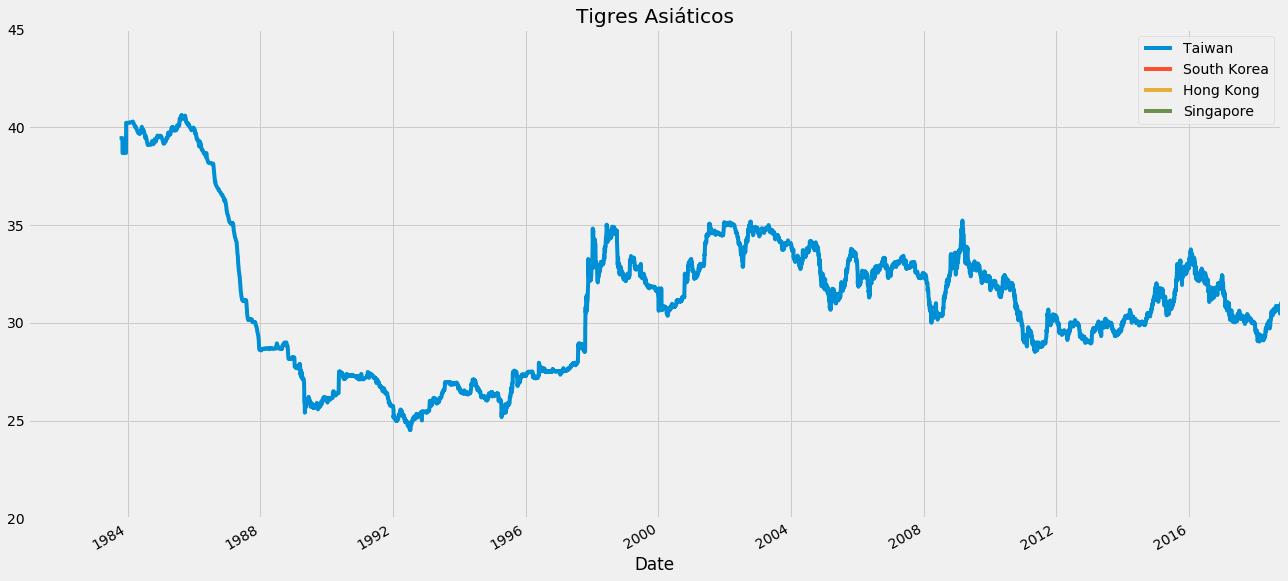

In [17]:
plt.style.use('fivethirtyeight')
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim =(20, 45))

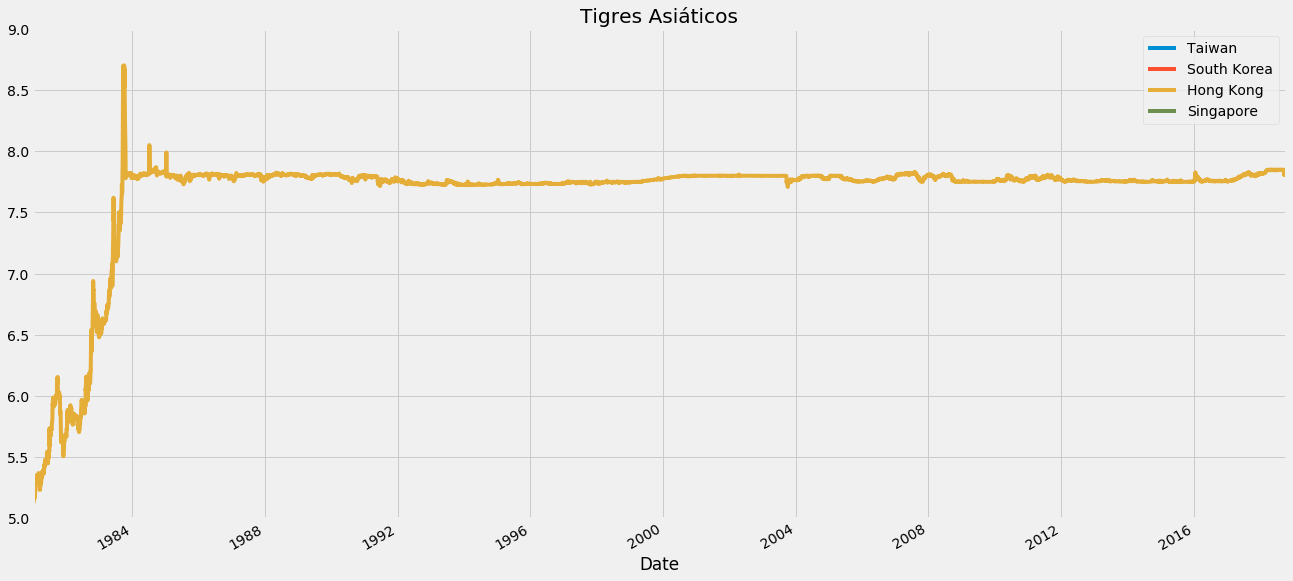

In [18]:
plt.style.use('fivethirtyeight')
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (5, 9))

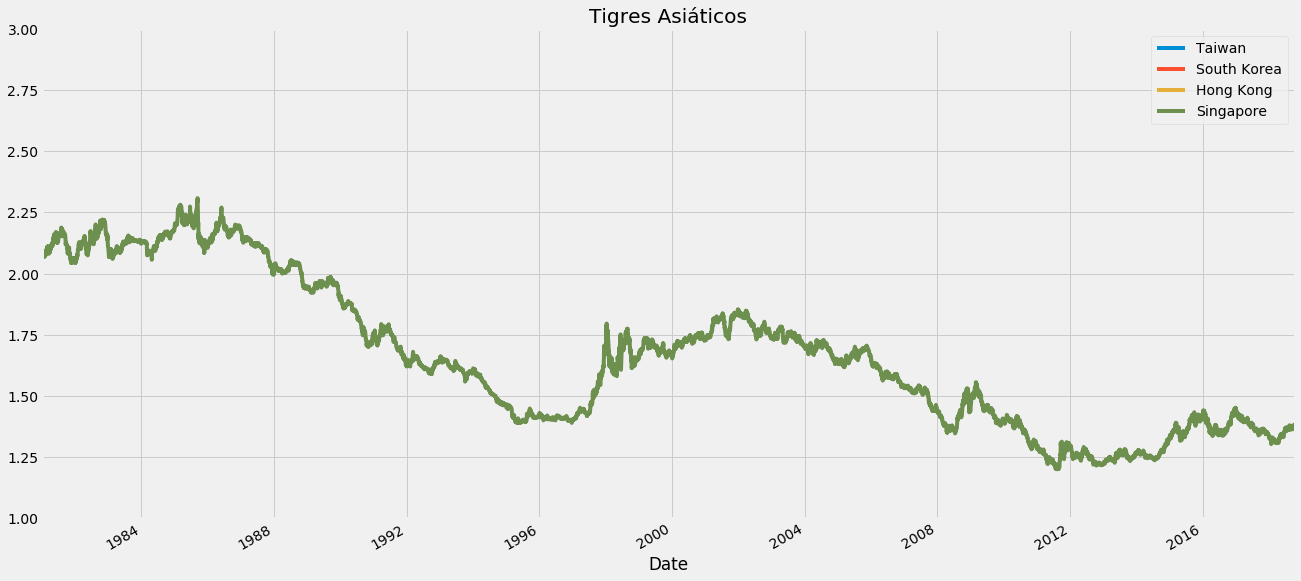

In [19]:
plt.style.use('fivethirtyeight')
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (1, 3))

## Aumento do preço dolar na Venezuela (2017-2018)

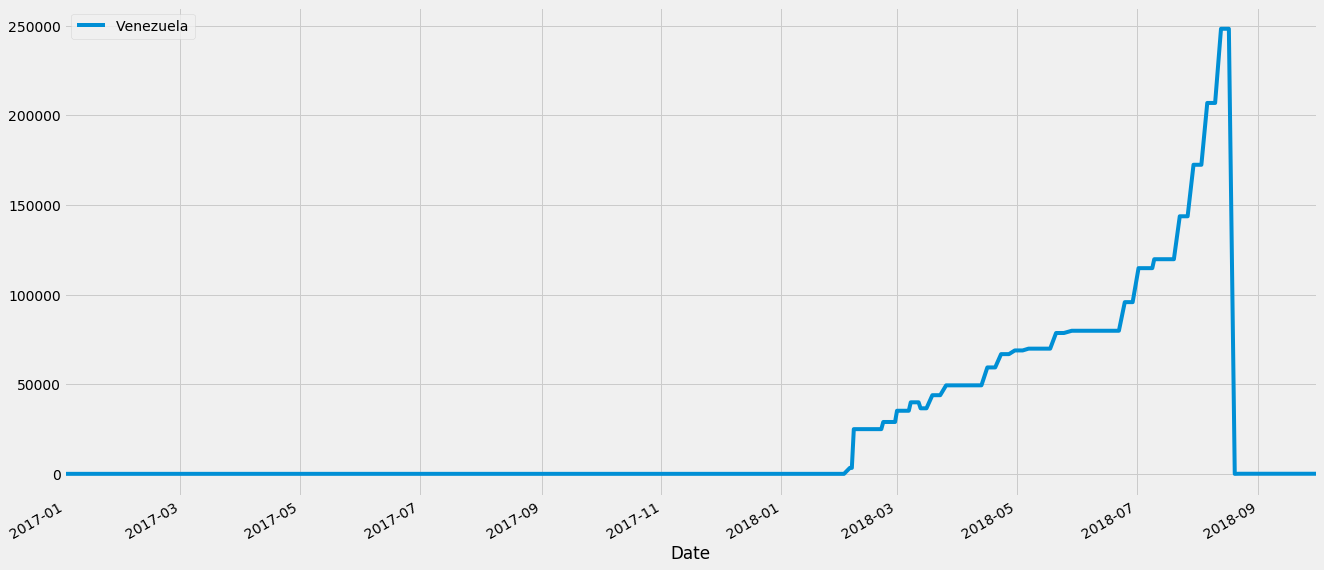

In [20]:
plt.style.use('fivethirtyeight')
dfusd[dfusd['Country'] == 'Venezuela'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = 'Venezuela',
                                      ax = plt.gca(), figsize = (20,10)
                                      ).set_xlim(left=dt.datetime(2017,1,1), right=dt.datetime(2018,10,1))
plt.show()

##### A queda brusca entre os meses de agosto e outubro representa a mudança da moeda no país

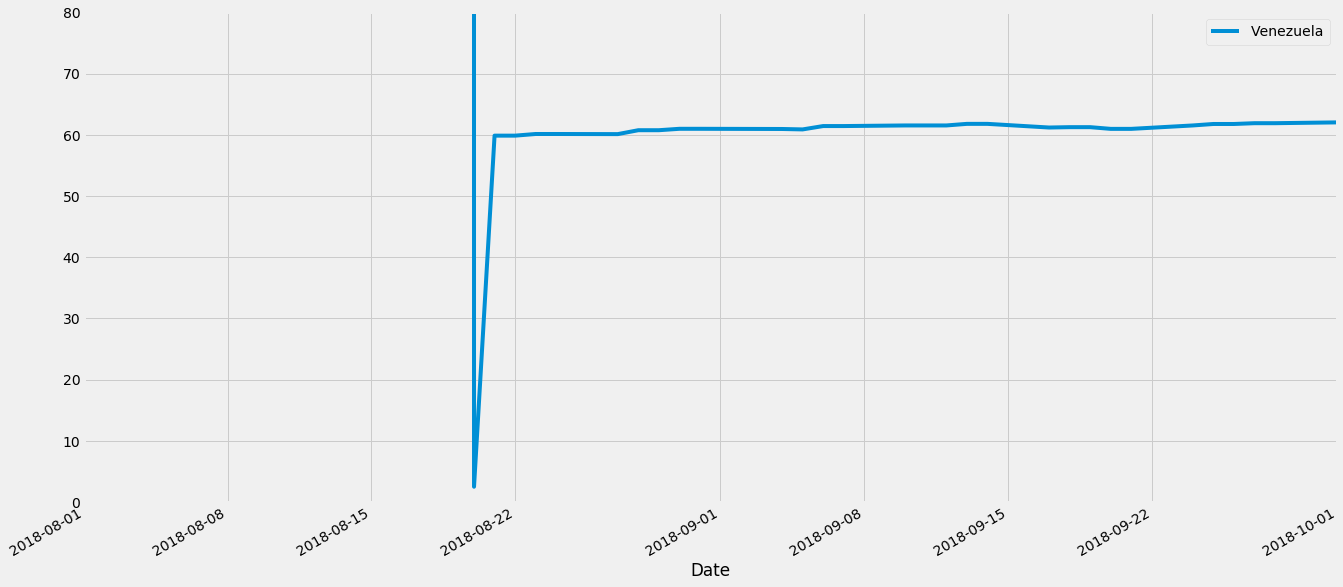

In [21]:
plt.style.use('fivethirtyeight')
dfusd[dfusd['Country'] == 'Venezuela'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = 'Venezuela',
                                      ax = plt.gca(), figsize = (20,10), ylim = (0, 80)
                                      ).set_xlim(left=dt.datetime(2018,8,1), right=dt.datetime(2018,10,1))
plt.show()

# Variação do dolar nos países ecônomicamente mais livres do mundo 

In [22]:
listLivres = ['Hong Kong', 'Singapore', 'New Zealand', 'Switzerland', 'Australia']

print(listLivres)

['Hong Kong', 'Singapore', 'New Zealand', 'Switzerland', 'Australia']


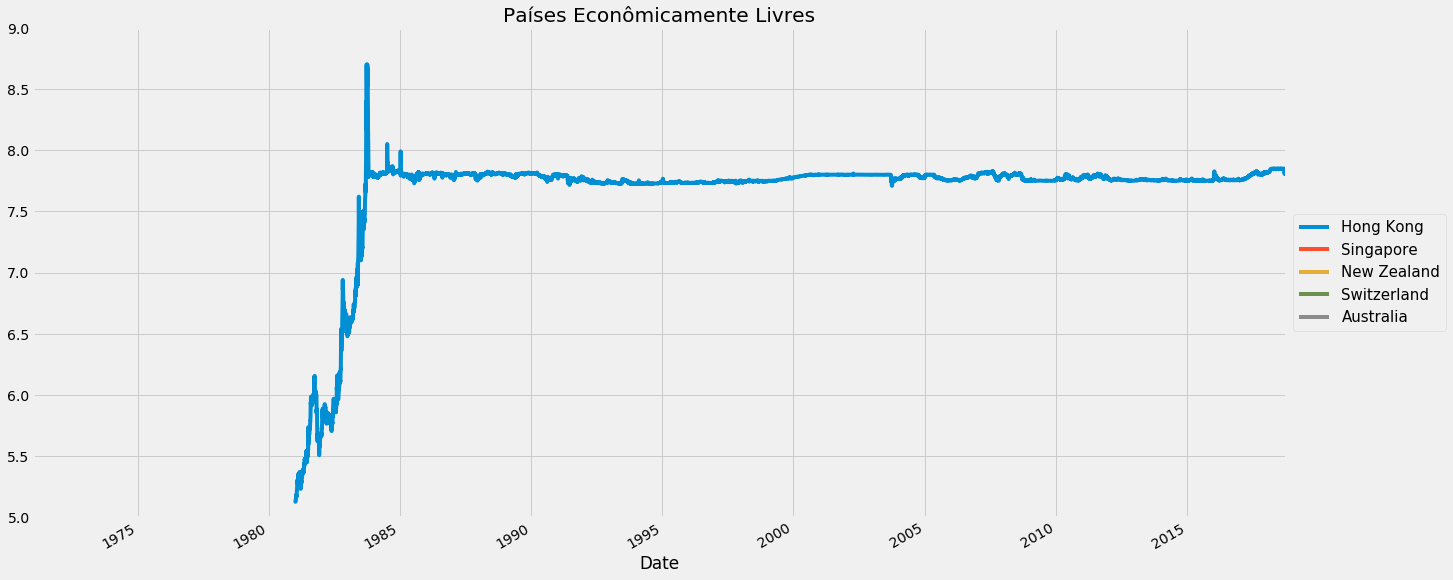

In [23]:
plt.style.use('fivethirtyeight')
for c in listLivres:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Países Econômicamente Livres',
                                      ax = plt.gca(), figsize = (20,10), 
                                     ylim = (5, 9))
legenda_format()
plt.show()

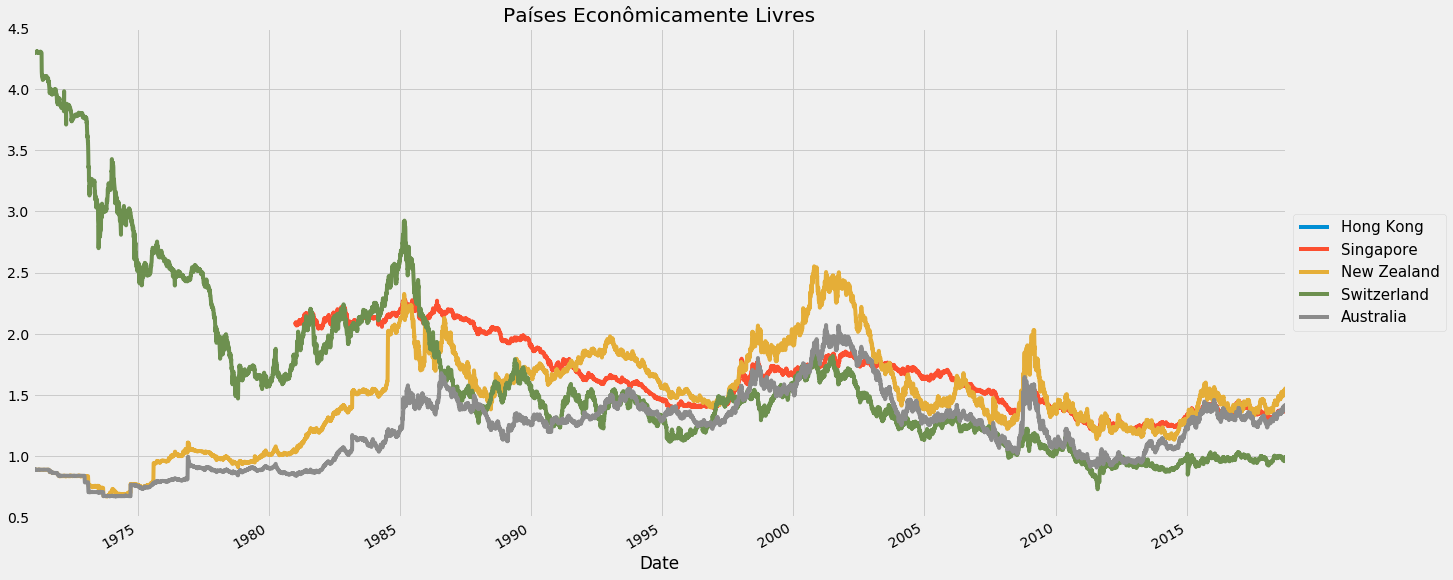

In [24]:
plt.style.use('fivethirtyeight')
for c in listLivres:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Países Econômicamente Livres',
                                      ax = plt.gca(), figsize = (20,10), 
                                     ylim = (0.5, 4.5))
legenda_format()
plt.show()

# Variação do dólar em cada país em 2018

In [25]:
df = pd.DataFrame({'Country':listC, 'Min':[0 for x in listC], 'Max': [0 for x in listC]})

In [26]:
for c, group in dfusd[dfusd['Date'].dt.year == 2018].groupby('Country'):
    df.loc[df['Country'] == c, 'Min'] = round(group['Exchange rate'].min(), 3)
    df.loc[df['Country'] == c, 'Max'] = round(group['Exchange rate'].max(), 3)
df['Diff'] = df['Max'] - df['Min']
df['Diff(%)Max'] = (df['Diff']  / df['Max']) *100

In [27]:
print(df.sort_values('Diff(%)Max',ascending  = False))

           Country       Min         Max        Diff  Diff(%)Max
1        Venezuela     2.482  248209.922  248207.440   99.999000
7     South Africa    11.550      15.472       3.922   25.349018
21          Brazil     3.147       4.202       1.055   25.107092
17          Sweden     7.855       9.223       1.368   14.832484
8            India    63.380      74.330      10.950   14.731602
4      New Zealand     1.350       1.553       0.203   13.071475
0           Mexico    17.970      20.670       2.700   13.062409
19       Australia     1.234       1.419       0.185   13.037350
14  United Kingdom     0.698       0.788       0.090   11.421320
2            China     6.265       6.933       0.668    9.635079
20          Norway     7.667       8.475       0.808    9.533923
3          Denmark     5.961       6.579       0.618    9.393525
6             Euro     0.801       0.882       0.081    9.183673
18           Japan   104.830     114.190       9.360    8.196865
12     Switzerland     0.

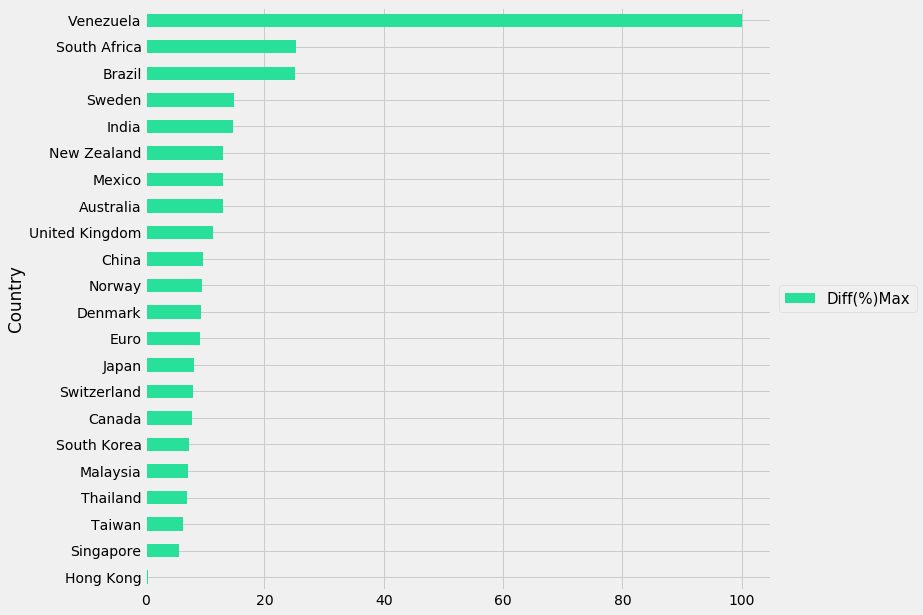

In [28]:
plt.style.use('fivethirtyeight')
df.sort_values('Diff(%)Max',ascending = True).plot(kind='barh',x='Country', y='Diff(%)Max', 
                                                   figsize=(10,10), color = '#29E09B')
legenda_format()
plt.show()